# 군집화(Clusting) - K Means 알고리즘 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Iris 데이터 군집화

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler # 표준화 - PCA 위해 ?
from sklearn.decomposition import PCA

In [12]:
# iris 데이터
iris = load_iris()
# 표준화
iris_std = StandardScaler().fit_transform(iris.data)
# 차원 축소
pca = PCA(n_components = 2) # 2차원으로 축소
iris_pca = pca.fit_transform(iris.data)
iris_pca[:3]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

- `K-Mean` 모델 생성 / 학습

In [6]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [7]:
kmeans = KMeans(n_clusters=3, random_state=2022)
kmeans.fit(iris_std)
# .fit_standard() X -> 그냥 .fit() ! 결과값 바로 나옴 

KMeans(n_clusters=3, random_state=2022)

In [9]:
# 학습 결과
kmeans.labels_
# y 값 안줘서 값이 어떤것을 의미하는지 모르지만 같은것 끼리 분류

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [10]:
np.unique(kmeans.labels_, return_counts=True)
# 0: 53개 / 1: 50개 / 2: 47개

(array([0, 1, 2], dtype=int32), array([53, 50, 47]))

In [25]:
# DataFrame으로 만들기 
df = pd.DataFrame({
     'PC1': iris_pca[:,0], 
     'PC2': iris_pca[:,1] ,
     'target': iris.target,
     'cluster': kmeans.labels_
})
df.head(55).tail(5)

,PC1,PC2,target,cluster
50,1.284826,0.685160,1,2
51,0.932489,0.318334,1,2
52,1.464302,0.504263,1,2
53,0.183318,-0.827959,1,0
54,1.088103,0.074591,1,0


In [26]:
# 데이터 분포 확인 
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
0      1         50
1      0         39
       2         11
2      0         14
       2         36

- 군집 결과 시각화

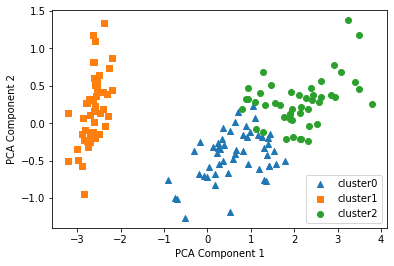

In [27]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))

plt.legend()
plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()

- 원본 데이터와 군집화된 데이터 비교 

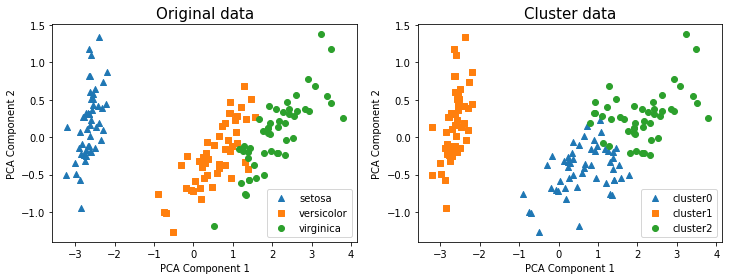

In [32]:
plt.figure(figsize=(12,4))
for k, column in enumerate(['target', 'cluster']):
  plt.subplot(1, 2, k+1) # target:0, cluster:1 이기 때문에 k+1
  for i, marker in enumerate(markers):
    x_data = df[df[column] == i]['PC1']
    y_data = df[df[column]  == i]['PC2']
    if k == 0:
      plt.title('Original data', fontsize=15)
      plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
    else:
      plt.title('Cluster data', fontsize=15)
      plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))

  plt.legend()
  plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()